## K-Nearest Neighbor (KNN) CLASSIFIER

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv("customer_dataset.csv")
df.head()

,Unnamed: 0,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


The target variable, called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Objective here is to build a classifier to predict the service category for unknown cases, using a specific type of classification called K-nearest neighbors.

In [3]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [4]:
pd.DataFrame(df.isnull().value_counts())

,,,,,,,,,,,,,count
Unnamed: 0,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,
False,False,False,False,False,False,False,False,False,False,False,False,False,1000


<Axes: >

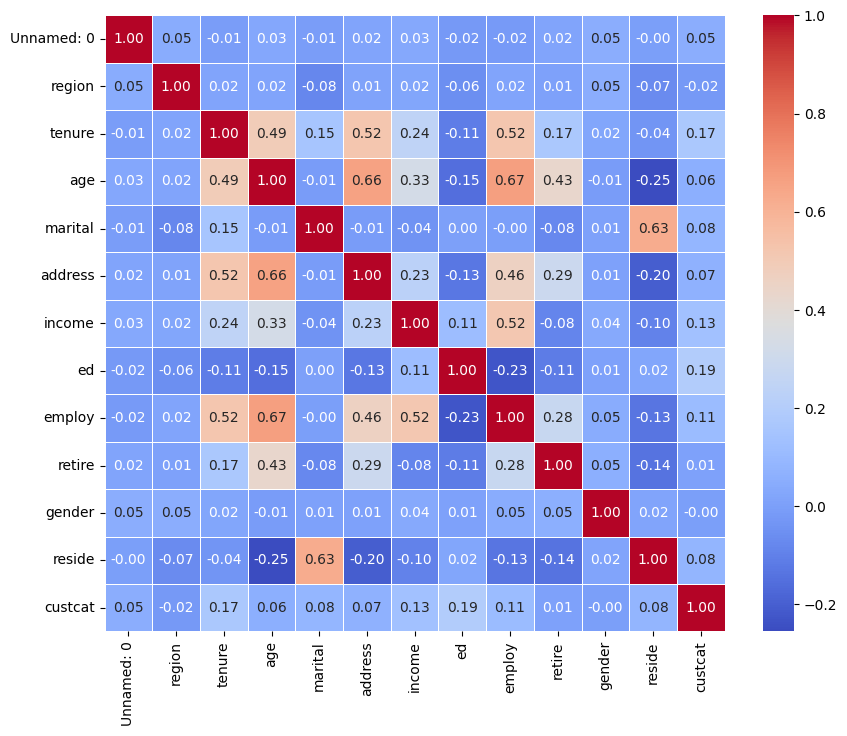

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [6]:
df.corr()["custcat"].sort_values(ascending = False)

custcat       1.000000
ed            0.193864
tenure        0.166691
income        0.134525
employ        0.110011
marital       0.083836
reside        0.082022
address       0.067913
age           0.056909
Unnamed: 0    0.049766
retire        0.008908
gender       -0.004966
region       -0.023771
Name: custcat, dtype: float64

In [7]:
X = df.drop("custcat", axis = 1)
Y= df["custcat"]

In [8]:
X_norm = StandardScaler().fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=4)

### KNN Classification

In [10]:
k = 3  # initially starting with k= 3

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

In [11]:
yhat = knn_model.predict(X_test)

In [12]:
print("Test set Accuracy with k = 3: ", accuracy_score(y_test, yhat))

Test set Accuracy with k = 3:  0.31


In [13]:
k = 6   #updated k
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat6 = knn_model_6.predict(X_test)
print(f"Test set Accuracy: {accuracy_score(y_test, yhat6)} ")

Test set Accuracy: 0.345 


Searching for best value of **"k"** between `k = 1-30`

In [14]:
Ks = 30
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

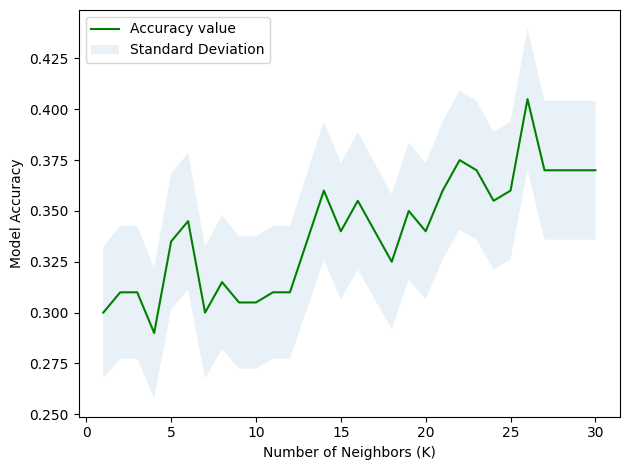

In [15]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [16]:
print( "best accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

best accuracy was with 0.405 with k = 26


Searching for best value of **"k"** between `k = 1-100`

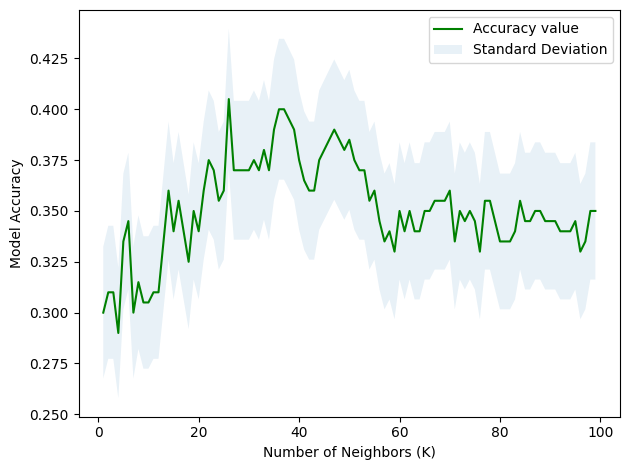

In [19]:
Ks =100
acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),acc,'g')
plt.fill_between(range(1,Ks),acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "best test accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

best test accuracy was with 0.405 with k = 26


### the best value of k is **`k= 26`**  with `accuracy = 40%`. after which the model performance starts declining